In [ ]:
# Determinants of Consumer Investment Behavior: An Empirical Assessment
# Analyzed bank marketing data to predict customer term deposit subscriptions. Used SQL for data extraction and Python for EDA to identify key conversion drivers like call duration and past campaign success. Developed charts using Matplotlib to visualize KPIs and optimize marketing targeting strategies.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Waseem khan\Downloads\archive (7)\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [26]:
df['balance'].max()

81204

In [5]:
df['job']=df['job'].str.replace('admin.', 'admin', regex=True)

In [50]:
df.rename(columns={'housing':'housing_loan','loan':'personal_loan'}, inplace = True)

In [9]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [11]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('my_table', conn, index=False, if_exists='replace')

11162

    marital  avg_savings  conversion_rate
0    single       1457.0             54.0
1  divorced       1372.0             48.0
2   married       1600.0             43.0


C:\Users\Waseem khan\AppData\Local\Temp\ipykernel_27568\1481775418.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (data = df_marital, y = 'marital', x = 'conversion_rate', palette = 'rocket')


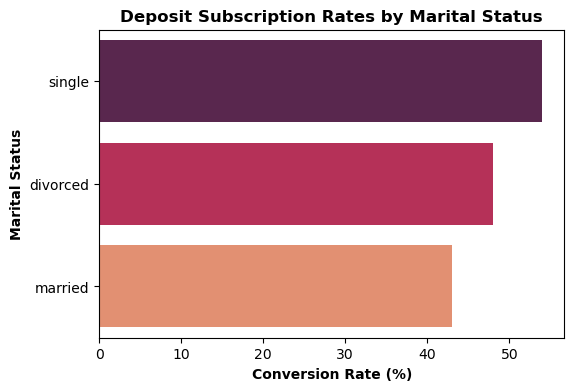

In [97]:
# AGGREGATED DEPOSIT CONVERSION METRICS BY MARITAL SEGMENT

import matplotlib.pyplot as plt
import seaborn as sns

query="""
select marital, round(avg(balance),0) as avg_savings, round(100.0 * sum(case when deposit = 'yes' then 1 else 0 end)/ count(*),0) as conversion_rate 
from my_table
group by marital
order by conversion_rate desc
"""
df_marital = pd.read_sql_query(query,conn)
print(df_marital)

plt.figure(figsize=(6,4))
sns.barplot (data = df_marital, y = 'marital', x = 'conversion_rate', palette = 'rocket')
plt.title('Deposit Subscription Rates by Marital Status', fontweight = 'bold')
plt.ylabel('Marital Status', fontweight = 'bold')
plt.xlabel('Conversion Rate (%)', fontweight = 'bold')
plt.show()

In [148]:
# Customer Account Balance Buckets and Deposit Conversion Analysis

query="""
select case when balance between 1 and 3000 then 'low (Under 3k)'  
 when balance between 3001 and 8000 then 'Mid (3001 - 8k)'
 when balance between 8001 and 15000 then 'High (8001 - 15k)'
 when balance <= 0 then 'in-debt'
 else 'Ultra High (Over 15k)'
 end as balance_segmentation,
count(*) as total_customers,
sum(case when deposit = 'yes' then 1 else 0 end) as total_deposits,
round(avg(balance),0) as avg_savings,
round(100.0  * sum(case when deposit = 'yes' then 1 else 0 end)/count(*),0) as conversion_rate
from my_table
group by balance_segmentation
order by conversion_rate desc
"""

result = pd.read_sql_query(query,conn)
print(result)

    balance_segmentation  total_customers  total_deposits  avg_savings  \
0      High (8001 - 15k)              252             151      10527.0   
1        Mid (3001 - 8k)             1238             722       4688.0   
2  Ultra High (Over 15k)               88              44      25940.0   
3         low (Under 3k)             8122            3870        806.0   
4                in-debt             1462             502       -152.0   

   conversion_rate  
0             60.0  
1             58.0  
2             50.0  
3             48.0  
4             34.0  


In [49]:
# Impact of Education on Customer Deposit Conversion

query="""
select education, 
sum(case when deposit = 'yes' then 1 else 0 end) as total_customers,
round(100.0  * sum(case when deposit = 'yes' then 1 else 0 end)/count(*),0) as conversion_rate
from my_table
group by education
order by conversion_rate desc
"""

result = pd.read_sql_query(query,conn)
print(result)

   education  total_customers  conversion_rate
0   tertiary             1996             54.0
1    unknown              252             51.0
2  secondary             2450             45.0
3    primary              591             39.0


In [52]:
df

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [61]:
#Customer Debt Profile & Conversion Analysis

query="""
select housing as housing_loan, loan as personal_loan, count(*) as total_customers, 
round(avg(balance),0) as avg_savings,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by 1,2
order by conversion_rate desc
"""
result = pd.read_sql_query(query,conn)
print(result)


  housing_loan personal_loan  total_customers  avg_savings  conversion_rate
0           no            no             5256       1867.0             60.0
1          yes            no             4446       1359.0             38.0
2           no           yes              625        897.0             35.0
3          yes           yes              835        772.0             32.0


  contact_method  total_customers  active_customers  conversion_rate
0       cellular             8042              4369             54.0
1      telephone              774               390             50.0
2        unknown             2346               530             23.0


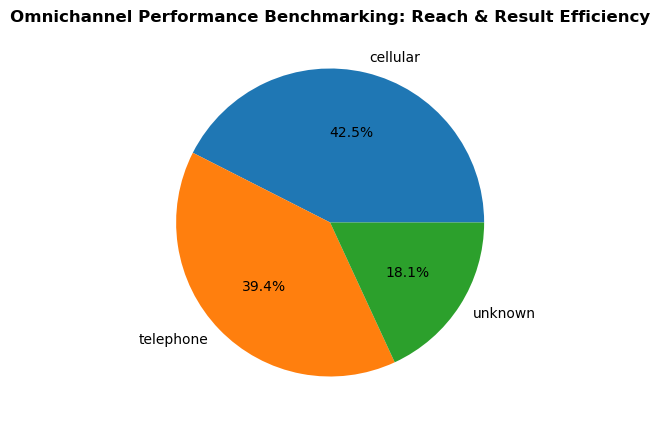

In [80]:
#Deposit Uptake Across Different Customer Contact Channels

query="""
select contact as contact_method, count(*) as total_customers,
sum(case when deposit = 'yes' then 1 else 0 end) as active_customers,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by 1
order by conversion_rate desc
"""
df_contact = pd.read_sql_query(query,conn)
print(df_contact)
plt.figure(figsize=(7,5))
plt.pie(df_contact['conversion_rate'], labels = df_contact['contact_method'], autopct='%1.1f%%')
plt.title('Omnichannel Performance Benchmarking: Reach & Result Efficiency', fontweight= 'bold')
plt.show()


              job  total_customers  active_customers  conversion_rate
0         student              360               269             75.0
1         retired              778               516             66.0
2      unemployed              357               202             57.0
3      management             2566              1301             51.0
4         unknown               70                34             49.0
5           admin             1334               631             47.0
6      technician             1823               840             46.0
7   self-employed              405               187             46.0
8        services              923               369             40.0
9       housemaid              274               109             40.0
10   entrepreneur              328               123             38.0
11    blue-collar             1944               708             36.0


C:\Users\Waseem khan\AppData\Local\Temp\ipykernel_27568\258027252.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_job, x = 'job', y = 'conversion_rate', palette = 'crest')


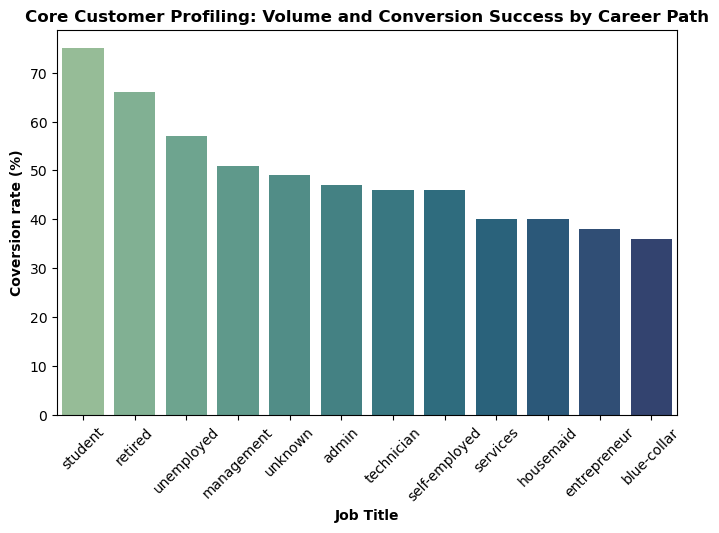

In [96]:
# LEAD PRIORITIZATION

query="""
select job, count(*) as total_customers,
sum(case when deposit = 'yes' then 1 else 0 end) as active_customers,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by 1
order by conversion_rate desc
"""
df_job = pd.read_sql_query(query, conn)
print(df_job)

plt.figure(figsize=(8,5))
sns.barplot(data = df_job, x = 'job', y = 'conversion_rate', palette = 'crest')
plt.title('Core Customer Profiling: Volume and Conversion Success by Career Path', fontweight = 'bold')
plt.xlabel('Job Title', fontweight = 'bold')
plt.ylabel('Coversion rate (%)', fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

   month  total_customers  active_customers  avg_savings  conversion_rate
0    dec              110               100       2735.0             91.0
1    mar              276               248       2119.0             90.0
2    sep              319               269       1931.0             84.0
3    oct              392               323       2038.0             82.0
4    apr              923               577       1734.0             63.0
5    feb              776               441       1568.0             57.0
6    jun             1222               546       1601.0             45.0
7    aug             1519               688       1581.0             45.0
8    nov              943               403       2350.0             43.0
9    jul             1514               627       1061.0             41.0
10   jan              344               142       1151.0             41.0
11   may             2824               925       1192.0             33.0


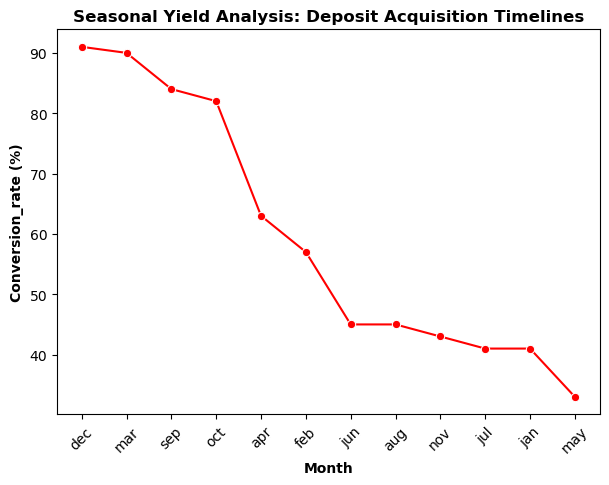

In [100]:
# MONTHLY CONVERSION VARIANCE

query="""
select month, count(*) as total_customers,
sum(case when deposit = 'yes' then 1 else 0 end) as active_customers,
round(avg(balance),0) as avg_savings,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by 1
order by conversion_rate desc
"""
df_month = pd.read_sql_query(query, conn)
print(df_month)

plt.figure(figsize=(7,5))
sns.lineplot(data = df_month, x = 'month', y = 'conversion_rate', marker = 'o', color = 'red')
plt.title('Seasonal Yield Analysis: Deposit Acquisition Timelines', fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')
plt.xticks(rotation=45)
plt.ylabel('Conversion_rate (%)', fontweight = 'bold')
plt.show()


            customer_bucket  active_customers  conversion_rate
0  Senior Citizen (Over 60)               502             82.0
1                30 & Under              1145             57.0
2     Middle-Aged (41 - 60)               811             44.0
3           Adult (31 - 40)              2831             42.0


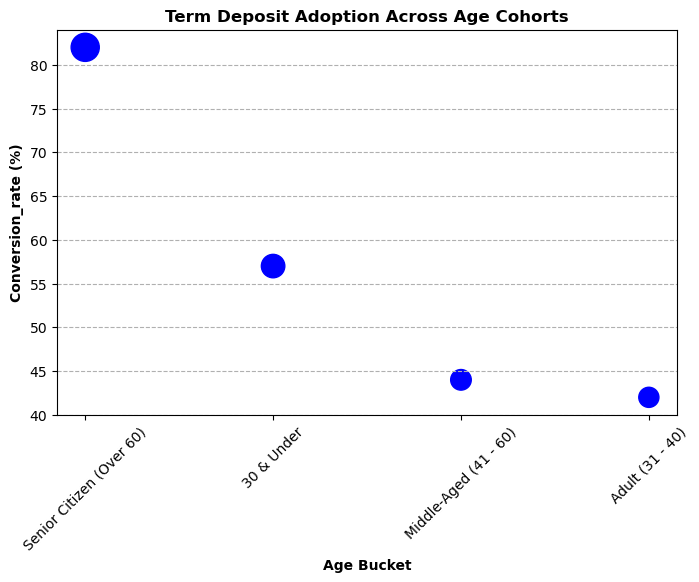

In [126]:
# Demographic Segmentation: Age Cohort Performance

query="""
select case when age <= 30 then '30 & Under'
 when age between 31 and 50 then 'Adult (31 - 40)'
 when age between 51 and 60 then 'Middle-Aged (41 - 60)'
else 'Senior Citizen (Over 60)'
end as customer_bucket,
sum(case when deposit = 'yes' then 1 else 0 end) as active_customers,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by customer_bucket
order by conversion_rate desc
"""
df_age = pd.read_sql_query(query, conn)
print(df_age)

plt.figure(figsize=(8,5))
plt.scatter(df_age['customer_bucket'], df_age['conversion_rate'], s = df_age['conversion_rate'] * 5, color = 'blue')
plt.title('Term Deposit Adoption Across Age Cohorts', fontweight = 'bold')
plt.xlabel('Age Bucket',  fontweight = 'bold')
plt.ylabel('Conversion_rate (%)', fontweight = 'bold')
plt.xticks(rotation= 45)
plt.grid(axis ='y', linestyle ='--')
plt.show()


  poutcome  total_customers  active_customers  avg_savings  conversion_rate
0  success             1071               978       1980.0             91.0
1    other              537               307       1938.0             57.0
2  failure             1228               618       1544.0             50.0
3  unknown             8326              3386       1442.0             41.0


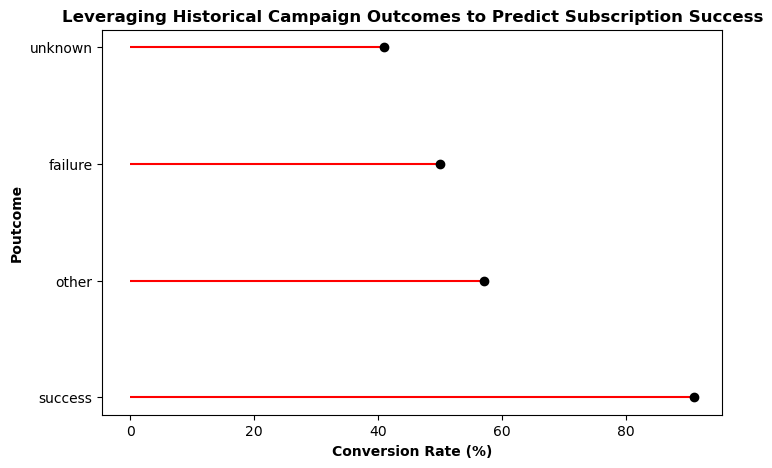

In [143]:
# Historical Lead Performance & Behavioral Pathing

query="""
select poutcome, count(*) as total_customers,
sum(case when deposit = 'yes' then 1 else 0 end) as active_customers,
round(avg(balance),0) as avg_savings,
round(sum(case when deposit = 'yes' then 1 else 0 end) * 100.0 / count(*),0) as conversion_rate
from my_table
group by 1
order by conversion_rate desc
"""
df_poutcome= pd.read_sql_query(query, conn)
print(df_poutcome)

plt.figure(figsize=(8,5))
plt.hlines(y=df_poutcome['poutcome'], xmin = 0, xmax = df_poutcome['conversion_rate'], color ='red')
plt.plot(df_poutcome['conversion_rate'], df_poutcome['poutcome'], "o", color ='black')
plt.xlabel('Conversion Rate (%)', fontweight = 'bold')
plt.ylabel('Poutcome', fontweight = 'bold')
plt.title('Leveraging Historical Campaign Outcomes to Predict Subscription Success', fontweight= 'bold')
plt.show()
